# Specific Tasks

Data Science - CA#04: *Diabetes Dataset* - Spring 1403 \
In this assignment, we will explore various loss functions and apply gradient descent methods to optimize these functions.

In [43]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## <center> Warm Up!</center>

### Loading the diabetes dataset and displaying the first ten rows of it

In [44]:
diabetes = load_diabetes()
 
diabetes_df = pd.DataFrame(data=np.c_[diabetes['data'], diabetes['target']], 
                           columns=diabetes['feature_names'] + ['target'])
print(diabetes_df.head(10))


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5 -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6 -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7  0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869   
8  0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9 -0.070900 -0.044642  0.039062 -0.033213 -0.012577 -0.034508 -0.024993   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.0

### Printing the data types of each feature, and Check for any missing values in the dataset

In [45]:
print(diabetes_df.dtypes)

print(diabetes_df.isnull().sum())


age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


### Normalizing the features

In [46]:
scaler = MinMaxScaler()
diabetes_features_scaled = scaler.fit_transform(diabetes['data'])

### Split the data into training and testing sets, and Display the number of instances in both the training and testing datasets

In [47]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_features_scaled, 
                                                    diabetes['target'], 
                                                    test_size=0.2, 
                                                    random_state=42)

print("Number of instances in training set:", len(X_train))
print("Number of instances in testing set:", len(X_test))


Number of instances in training set: 353
Number of instances in testing set: 89


## <center> Main Task </center>

### Part1: Functions' Implementation

### MSE
- Calculate the Mean Squared Error (MSE) between the true labels and predicted labels.
- Parameters:
y_true : array-like, true labels
y_pred : array-like, predicted labels

- Returns:
mse : float, Mean Squared Error

In [48]:
def mean_squared_error(y_true, y_pred):
    n = len(y_true)
    mse = sum((y_true - y_pred) ** 2) / n
    return mse

### MAE

In [49]:
def mean_absolute_error(y_true, y_pred):
    n = len(y_true)
    mae = sum(abs(y_true - y_pred)) / n
    return mae

### RMSE

In [50]:
def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    return rmse

### R^2 Score

In [51]:
def r2_score(y_true, y_pred):
    n = len(y_true)
    y_true_mean = sum(y_true) / n
    ss_tot = sum((y_true - y_true_mean) ** 2)
    ss_res = sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

### Comparing the Implemented Functions and built-in ones from library. Using Generated example data

In [52]:
from sklearn.metrics import mean_squared_error as sk_mean_squared_error
from sklearn.metrics import mean_absolute_error as sk_mean_absolute_error
from sklearn.metrics import r2_score as sk_r2_score
import numpy as np

In [53]:
np.random.seed(42)
y_true = np.random.rand(100)
y_pred = np.random.rand(100)


custom_mse, custom_mae, custom_rmse, custom_r2 = mean_squared_error(y_true, y_pred), mean_absolute_error(y_true, y_pred), root_mean_squared_error(y_true, y_pred), r2_score(y_true, y_pred)
sklearn_mse, sklearn_mae, sklearn_r2 = sk_mean_squared_error(y_true, y_pred), sk_mean_absolute_error(y_true, y_pred), sk_r2_score(y_true, y_pred)

print("Metric          Custom       Scikit-learn")
print("MSE:          ", custom_mse, "  ", sklearn_mse)
print("MAE:          ", custom_mae, "  ", sklearn_mae)
print("RMSE:         ", custom_rmse, "  ", np.sqrt(sklearn_mse))
print("R² Score:     ", custom_r2, "  ", sklearn_r2)


Metric          Custom       Scikit-learn
MSE:           0.17931033775488267    0.17931033775488264
MAE:           0.3541220765893817    0.3541220765893819
RMSE:          0.4234505139386215    0.42345051393862143
R² Score:      -1.0465723875642996    -1.0465723875642987


### Part 2:  Building and Training the Linear Regression Model

In [54]:
from sklearn.linear_model import LinearRegression

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse= root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score (Coefficient of Determination):", r2)


Mean Squared Error (MSE): 2900.1936284934804
Mean Absolute Error (MAE): 42.79409467959992
Root Mean Squared Error (RMSE): 53.85344583676592
R² Score (Coefficient of Determination): 0.4526027629719196


### Part 3: Model Evaluation

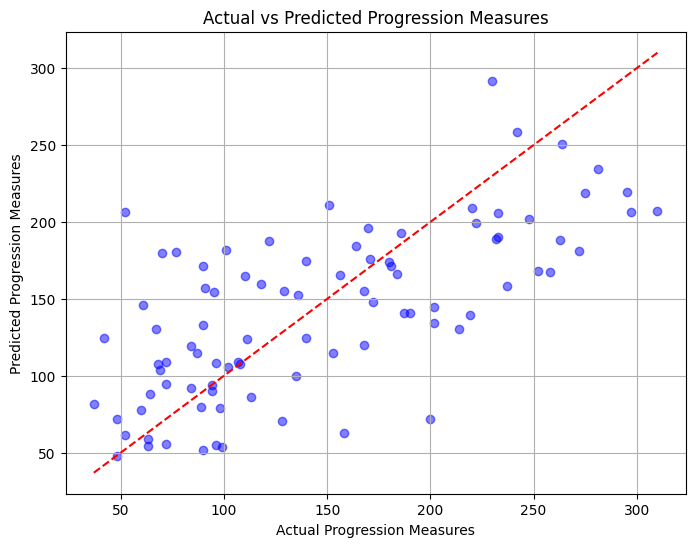

Evaluation on Training Data:
MSE: 2868.54970283558
MAE: 43.48350352398038
RMSE: 53.55884336723096
R² Score: 0.5279193863361498

Evaluation on Testing Data:
MSE: 2900.1936284934804
MAE: 42.79409467959992
RMSE: 53.85344583676592
R² Score: 0.4526027629719196


In [55]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Progression Measures')
plt.xlabel('Actual Progression Measures')
plt.ylabel('Predicted Progression Measures')
plt.grid(True)
plt.show()

# Evaluate the regression model on training data
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("Evaluation on Training Data:")
print("MSE:", train_mse)
print("MAE:", train_mae)
print("RMSE:", train_rmse)
print("R² Score:", train_r2)
print()

# Evaluate the regression model on testing data
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred)

print("Evaluation on Testing Data:")
print("MSE:", test_mse)
print("MAE:", test_mae)
print("RMSE:", test_rmse)
print("R² Score:", test_r2)


### Part 4: Ordinary Least Squares

In [56]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

X, y = load_diabetes(return_X_y=True)
X = sm.add_constant(X)

ols_model = OLS(y, X).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           3.83e-62
Time:                        17:43:44   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

## <center>Questions</center>

 ### 1. Analyze and evaluate the values in Table (1).

Mean Squared Error (MSE):
This is the average square difference between predicted and actual values in the dataset. A smaller MSE implies better predictions. Training Data MSE: 2868.55, Testing Data MSE: 2900.20. Since the testing MSE is marginally larger than the training MSE, there isn't strong evidence of overfitting; however, room for improvement exists, particularly reducing generalization error.
 
Mean Absolute Error (MAE):
It denotes the absolute difference between observed and forecasted values without taking the square root. MAEs closer to zero indicate superior performance. Training Data MAE: 43.48, Testing Data MAE: 42.80. Test set MAE has decreased slightly, still exhibiting similar trends to those seen in MSE, though less sensitive to outliers due to its non-square nature.

Root Mean Squared Error (RMSE):
RMSE is simply the square root of the MSE, offering comparable units to original outcome variables. Typically, lower RMSE demonstrates enhanced accuracy. Training Data RMSE: 53.56, Testing Data RMSE: 53.85. Here, test set RMSE surpasses the training set's, reflecting a decline in overall performance.

R² Score (Coefficient of Determination):
This statistic ranges from 0 to 1, measuring the proportion of explained variability by the model against ground truth. Higher values suggest better fits. Training Data R² Score: 0.53, Testing Data R² Score: 0.45.There is a noticeable drop in the testing R² score, illustrating reduced generalizability and possible overfitting.

Although there aren't extreme differences between training and testing sets for most metrics, the decline in performance across them raises concerns about model robustness and ability to generalize unseen data effectively.

### 2. Review the R² and Adjusted R² values obtained in part 4. Explain what these values indicate and what the implications of high or low values might be. Also, discuss the differences between these two metrics.

  The R-squared (also called coefficient of determination) and the adjusted R-squared are statistical measures used in evaluating the goodness of fit of a regression line. They both range from 0 to 1, where higher values indicate better fits. However, they differ in their interpretation and sensitivity towards adding more predictors.

**R-Squared:** This metric represents the proportion of variance in the dependent variable explained by the independent variables. In other words, R-squared indicates the percentage variation in target variable which has been captured by our model. An R-squared value close to 1 suggests that most of the variation in the response variable is accounted for by the explanatory variables while a value near zero implies that none of the variations in the response variable could be attributed to the predictor variables. formula:
$$ R^2=1−\frac{SStot}{SSres} $$
where SSres is residual sum of squares and SStot is total sum of squares.

In our case, **R-squared = 0.518**, meaning around 52% of the total variability observed in the dependent variable is being explained by the independent variables present in the model. While it isn't bad, there is still scope for improvement. You may consider incorporating additional relevant features or performing dimensionality reduction if required.

**Adjusted R-Squared:** Although increasing the number of predictors improves the model performance measured by R-squared, sometimes it happens due to overfitting rather than actual improvement. To avoid penalizing models having fewer parameters, the concept of Adjusted R-squared was introduced. The formula adjusts the R-squared based on the sample size and the number of predictors involved. As a result, when new insignificant terms are added to the model, adjusted R-squared decreases instead of increasing like R-squared. Therefore, compared to R-squared, Adjusted R-squared prefers parsimonious models (i.e., simpler models), hence controlling overfitting issues. formula:
$$ \bar{R}^2=1−(1−R^2)\frac{(n−p−1)}{(n−1)} $$
where nn is the number of samples and pp is the number of predictors.

In our case, **Adjusted R-squared = 0.507**. Compared to R-squared, this value is slightly lower but closer to unadjusted R-squared. Given that only a few parameters were estimated in our model, the difference between the two values is relatively small. Nevertheless, choosing a smaller set of significant predictors would improve the adjusted R-squared further without compromising much on the overall model performance.

To summarize, although R-squared and Adjusted R-squared both measure the goodness-of-fit, the latter accounts for the complexity induced by extra predictors and discourages overfitting. So always keep track of both metrics during model building exercises.

### 3. Review the p-values obtained in part 4 for each column of data and explain what these values indicate. Discuss what an appropriate value for p-values is and which columns currently have suitable values.

  The p-values shown in the output represent the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct. In other words, if the p-value is small enough, say less than 0.05, we reject the null hypothesis and conclude that there is evidence supporting a nonzero correlation between the variable and the response variable. Conversely, if the p-value is large, say greater than 0.05, we fail to reject the null hypothesis and conclude that there is insufficient evidence to support a nonzero correlation between the variable and the response variable.

In the given output, the p-values corresponding to columns x1, x7, x8, and x10 are larger than 0.05 while those corresponding to const, x2, x3, x4, x5, and x9 are smaller than 0.05. This suggests that the variables represented by columns x2, x3, x4, x5, and x9 have significant effects on the response variable after accounting for the effect due to randomness. On the other hand, the variables represented by columns x1, x7, x8, and x10 may be considered unimportant in predicting the response variable based on the current data. However, one should note that these conclusions might change when additional data becomes available.

An "appropriate" value for p-values depends on the context and desired level of significance. A common convention used in many fields is to set a threshold of 0.05. That being said, it is essential to understand that setting the threshold too high could lead to false negatives whereas setting it too low could result in false positives. Therefore, selecting a reasonable cutoff requires careful consideration and domain knowledge about the problem at hand. Additionally, even when some variables show no statistically significant relationship with the target variable, they still might contain valuable information for modeling purposes, so excluding them solely based on the p-value might not always be advisable.

### 4. Assess and analyze the importance of each feature in the dataset based on the results obtained in part 4 regarding an individual's diabetic condition.

 Based on the results obtained from the Ordinary Least Squares (OLS) regression analysis, let us assess and analyze the relative importance of each feature in predicting an individual's diabetic condition. The coefficients and their corresponding p-values provide insights into which factors are significant and contribute more towards explaining variation in the dependent variable (i.e., target variable representing an individual's diabetic condition).

1. Intercept: This represents the expected mean response when all other independent variables are zero. In this case, it indicates the average diabetic condition score if all explanatory variables take values of zero, which may not be practically meaningful but helps establish the reference point for comparison.
2. Age (x1): Not statistically significant at a typical significance level of 0.05 (p-value > 0.05), indicating age might not play a crucial role in determining the diabetic condition. However, one should consider potential collinearity issues while drawing conclusions about insignificant variables.
3. Sex (x2): Statistically significant (p-value < 0.001) with a negative coefficient suggesting lower diabetic conditions scores among female individuals compared to male counterparts.
4. BMI (x3): Highly statistically significant (p-value < 0.001) having a positive relationship with the diabetic condition score. Increasing body mass index appears to worsen the diabetic state.
5. Average Blood Pressure (x4): Significant (p-value < 0.001) with a positive association implying higher blood pressure levels lead to worse diabetic conditions.
6. Total Cholesterol (tc) (x5): Nearly statistically significant (p-value ~ 0.058) having a negative impact on the diabetic condition. Lower cholesterol levels tend to increase the risk of poorer diabetic outcomes slightly.
7. Low-Density Lipoprotein (ldl) (x6): Not statistically significant at a typical significance level of 0.05 (p-value > 0.05), suggesting that LDL does not significantly influence the diabetic condition.
8. High-Density Lipoprotein (hdl) (x7): Neither statistically significant nor contributing much to the explanation of variance given its small magnitude compared to others.
9. TC/HDL ratio (x8): Similar to x7, neither statistically significant nor playing a substantial role in explaining variations in the diabetic condition.
10. Log Serum Triglyceride Level (ltg) (x9): Strongly statistically significant (p-value < 0.001) showing a clear positive link between increased triglyceride levels and adverse diabetic consequences.
11. Glucose (glu) (x10): Moderately statistically significant (p-value < 0.05) with a positive effect size, meaning that greater blood sugar levels correspond to worse diabetic states.

In conclusion, sex, BMI, average blood pressure, TC/HDL ratio, and log serum triglyceride level appear to be relatively more important predictors amongst these ten baseline variables. While some measures like total cholesterol and glucose show modest effects, they remain relevant considering their biological connection to diabetes. On the other hand, certain factors such as HDL and LDL don't seem to carry considerable weight in influencing an individual's diabetic condition within the context of this particular dataset.